## 4. Explore functions in igraph - at least 10 of them. Here some functions are explored with a simplified version of Astrocollab. We can see the difference between this and using the entire data set.

In [2]:
library(igraph)
load("~/Downloads/astrocollab.Rdata")
summary(astrocollab)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



IGRAPH UNW- 16706 121251 -- Astrophysics collaborations
+ attr: name (g/c), Author (g/c), Citation (g/c), URL (g/c),
| Description (g/c), name (v/c), weight (e/n)


#### 1. Find the verticies

In [3]:
#verticies of astrocollab
V(astrocollab)

This graph was created by an old(er) igraph version.
  Call upgrade_graph() on it to use with the current igraph version
  For now we convert it on the fly...
This graph was created by an old(er) igraph version.
  Call upgrade_graph() on it to use with the current igraph version
  For now we convert it on the fly...


+ 16706/16706 vertices, named:
    [1] BIERMANN, PL                     STANEV, TKGT                    
    [3] GOLDMAN, I                       WANDEL, A                       
    [5] PILDIS, RA                       BREGMAN, JN                     
    [7] EVRARD, AE                       SWARTZ, DA                      
    [9] SUTHERLAND, PG                   HARKNESS, RP                    
   [11] BECKER, W                        BARZIER, KTS                    
   [13] TRUEMPER, J                      ANGELANTONJ, C                  
   [15] AMENDOLA, L                      LITTERIO, M                     
   [17] OCCHIONERO, F                    LOEB, A                         
   [19] BRAINERD, JJ                     MEEGAN, CA                      
+ ... omitted several vertices

#### 2. Upgrade_graph: Igraph's internal data representation changes sometimes between versions. This means that it is not possible to use igraph objects that were created (and possibly saved to a file) with an older igraph version.

In [4]:
#making it easier to use astrocollab
astrocollab <- upgrade_graph(astrocollab)
astrocollab

IGRAPH UNW- 16706 121251 -- Astrophysics collaborations
+ attr: name (g/c), Author (g/c), Citation (g/c), URL (g/c),
| Description (g/c), name (v/c), weight (e/n)
+ edges (vertex names):
 [1] BIERMANN, PL  --STANEV, TKGT   GOLDMAN, I    --WANDEL, A     
 [3] PILDIS, RA    --BREGMAN, JN    PILDIS, RA    --EVRARD, AE    
 [5] BREGMAN, JN   --EVRARD, AE     SWARTZ, DA    --SUTHERLAND, PG
 [7] SWARTZ, DA    --HARKNESS, RP   SUTHERLAND, PG--HARKNESS, RP  
 [9] BECKER, W     --BARZIER, KTS   BECKER, W     --TRUEMPER, J   
[11] BARZIER, KTS  --TRUEMPER, J    ANGELANTONJ, C--AMENDOLA, L   
[13] ANGELANTONJ, C--LITTERIO, M    AMENDOLA, L   --LITTERIO, M   
+ ... omitted several edges

#### 3. Finding degrees of each vertex, degree(): Description
The degree of a vertex is its most basic structural property, the number of its adjacent edges.

Usage: degree(graph, v = V(graph), mode = c("all", "out", "in", "total"),
  loops = TRUE, normalized = FALSE)

In [5]:
degree(astrocollab)

BIERMANN, PL                     STANEV, TKGT 
                              36                                1 
                      GOLDMAN, I                        WANDEL, A 
                               5                                4 
                      PILDIS, RA                      BREGMAN, JN 
                              16                               17 
                      EVRARD, AE                       SWARTZ, DA 
                              47                               12 
                  SUTHERLAND, PG                     HARKNESS, RP 
                               2                                2 
                       BECKER, W                     BARZIER, KTS 
                              17                                3 
                     TRUEMPER, J                   ANGELANTONJ, C 
                              70                                3 
                     AMENDOLA, L                      LITTERIO, M 
                              13                                3 
                   OCCHIONERO, F                          LOEB, A 
                               7                               33 
                    BRAINERD, JJ                       MEEGAN, CA 
                              26                               72 
                      BRIGGS, MS                    PENDLETON, GN 
                             111                               51 
                       BROCK, MN                         MOHR, JJ 
                               4                               24 
                   GELLER, DGFMJ                       FARAONI, V 
                               2                                6 
                 COOPERSTOCK, FI                     OVERDUIN, JM 
                               3                                2 
                       HELBIG, P                        KAYSER, R 
                              23                                5 
                     ANDREANI, P                        CASOLI, F 
                              67                               32 
                        GERIN, M                       HELENE, DN 
                              15                                2 
                      GEORGES, P                         LYON, OD 
                               2                                2 
                     MAARTENS, R                       ELLIS, GFR 
                              32                               11 
                     STOEGER, WR                     HERNQUIST, L 
                               2                               62 
                   SIGURDSSON, S                        BRYAN, GL 
                              22                               38 
                     BAHCALL, JN                      KIRHAKOS, S 
                              51                               24 
                   SCHNEIDER, DP                     THORSETT, SE 
                             105                               54 
                        YOUNG, K                  OBSERVATORY, CS 
                              14                                2 
                         EDU, RC                     TOZZI, GBFGP 
                               2                                1 
                      STANGA, RM                       UDALSKI, A 
                              13                               15 
                       KUBIAK, M                     SZYMANSKI, M 
                              17                               17 
                      KALUZNY, J                         MATEO, M 
                              27                              103 
                   KRZEMINSKI, W                       LEONARD, S 
                              14                                1 
                         LAKE, K                        BERERA, A 
                               6                                7 


#### 4. Function defined to find all verticies with 2 or less and 5 or more:

In [6]:
# function to find all people less thn 2 edges (degrees are the number of edges from each node and find names)
two <- function(graph){
    degrees <- degree(astrocollab)
    a <- degree(astrocollab) <= 2
    names <- names(which(degrees == a))
    return(names)
}


In [7]:
# function to find all people more than 5 edges (degrees are the number of edges from each node and find names)
five <- function(graph){
    degrees <- degree(astrocollab)
    a.1 <- degree(astrocollab) >= 5
    names.1 <- names(which(degrees == a.1))
    return(names.1)
}

In [8]:
less_than_two <- as.data.frame(two(astrocollab))
less_than_two <- na.omit(less_than_two)
less_than_two

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,two(astrocollab)
1,"STANEV, TKGT"
2,"TOZZI, GBFGP"
3,"LEONARD, S"
4,"ADAMS, F"
5,"UEDA, H"
6,"VOROBEV, P"
7,"KOLOKOLOV, I"
8,"BARGE, P"
9,"FR, JSB"
10,"CONTENSOU, GAMM"


In [9]:
greater_than_five <- as.data.frame(five(astrocollab))
greater_than_five <- na.omit(greater_than_five)
greater_than_five

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,five(astrocollab)
1,"FAIZULLIN, R"
2,"AL, SOE"
3,"MERRIFIELD, KKMR"
4,"STROMINGER, A"
5,"AL, KGCLBEAAJBE"
6,"DUBINSKI, KKJ"
7,"WANG, B"
8,"VADAS, SL"
9,"BERGER, J"
10,"CLEMENT, G"


#### 5. Histogram of an igraph using hist()

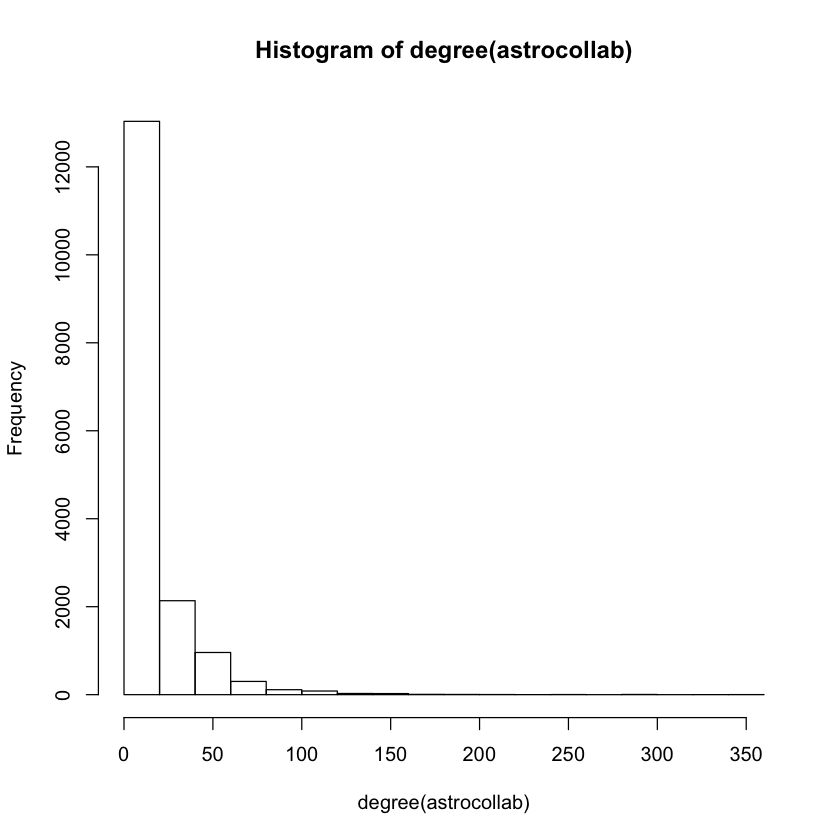

In [10]:
hist(degree(astrocollab))

In [11]:
library(intergraph)
degrees <- degree(astrocollab)

#### 6. Degree distribution - produces a numerical vector of graph verticies + 1 

In [12]:

astrodist <- degree.distribution(astrocollab, FALSE)
astrodist <- astrodist * 100
astrodist

[1]  3.950676404  8.092900754 10.888303603  9.415778762  7.602059140
  [6]  5.614749192  4.525320244  3.717227343  3.076738896  2.992936669
 [11]  2.364419969  2.256674249  2.160900275  1.682030408  1.753860888
 [16]  1.652101042  1.370764995  1.388722615  1.149287681  1.119358314
 [21]  1.251047528  0.844008141  0.861965761  0.873937507  0.861965761
 [26]  0.640488447  0.706333054  0.766191787  0.778163534  0.658446067
 [31]  0.760205914  0.712318927  0.401053514  0.562672094  0.514785107
 [36]  0.562672094  0.341194780  0.508799234  0.562672094  0.514785107
 [41]  0.353166527  0.556686221  0.353166527  0.359152400  0.323237160
 [46]  0.460912247  0.179576200  0.329223034  0.478869867  0.221477314
 [51]  0.209505567  0.365138274  0.173590327  0.371124147  0.227463187
 [56]  0.365138274  0.185562074  0.167604453  0.131689213  0.131689213
 [61]  0.149646833  0.221477314  0.101759847  0.125703340  0.089788100
 [66]  0.083802227  0.101759847  0.119717467  0.161618580  0.083802227
 [71]  0.101759847  0.071830480  0.071830480  0.083802227  0.047886987
 [76]  0.077816353  0.047886987  0.017957620  0.089788100  0.059858733
 [81]  0.041901113  0.035915240  0.065844607  0.047886987  0.071830480
 [86]  0.005985873  0.023943493  0.029929367  0.023943493  0.047886987
 [91]  0.017957620  0.041901113  0.035915240  0.023943493  0.029929367
 [96]  0.047886987  0.017957620  0.029929367  0.029929367  0.017957620
[101]  0.029929367  0.047886987  0.023943493  0.029929367  0.047886987
[106]  0.029929367  0.035915240  0.035915240  0.047886987  0.000000000
[111]  0.011971747  0.005985873  0.047886987  0.005985873  0.017957620
[116]  0.017957620  0.005985873  0.017957620  0.005985873  0.029929367
[121]  0.029929367  0.005985873  0.011971747  0.005985873  0.017957620
[126]  0.005985873  0.011971747  0.005985873  0.005985873  0.017957620
[131]  0.005985873  0.005985873  0.005985873  0.000000000  0.017957620
[136]  0.017957620  0.000000000  0.005985873  0.000000000  0.000000000
[141]  0.011971747  0.000000000  0.011971747  0.005985873  0.011971747
[146]  0.005985873  0.011971747  0.011971747  0.005985873  0.005985873
[151]  0.005985873  0.011971747  0.005985873  0.000000000  0.000000000
[156]  0.011971747  0.017957620  0.005985873  0.005985873  0.011971747
[161]  0.000000000  0.000000000  0.000000000  0.011971747  0.000000000
[166]  0.005985873  0.005985873  0.000000000  0.000000000  0.000000000
[171]  0.005985873  0.000000000  0.000000000  0.005985873  0.005985873
[176]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[181]  0.000000000  0.017957620  0.000000000  0.000000000  0.000000000
[186]  0.000000000  0.000000000  0.000000000  0.005985873  0.000000000
[191]  0.000000000  0.000000000  0.000000000  0.005985873  0.000000000
[196]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[201]  0.000000000  0.000000000  0.005985873  0.000000000  0.000000000
[206]  0.000000000  0.000000000  0.005985873  0.000000000  0.000000000
[211]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[216]  0.005985873  0.000000000  0.000000000  0.000000000  0.000000000
[221]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[226]  0.005985873  0.000000000  0.000000000  0.000000000  0.000000000
[231]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[236]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[241]  0.000000000  0.000000000  0.005985873  0.000000000  0.011971747
[246]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[251]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[256]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[261]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[266]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[271]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[276]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[281]  0.000000000  0.0000

In [ ]:
#around line 160, the matrix seems to become very sparse, so we can cut it off at 160

## 5. Determine:
* central person(s) in the graph
* longest path
* largest clique
* ego
* power centrality

#### We used the entire astrocollab data set as well as a sample, this is an example of a sample and the answers to the 5 questions.

*get a sample *

In [ ]:
astroSeq <- V(astrocollab)
astroSeq[51]

In [ ]:
length(astroSeq)

In [ ]:
#astronew, simplified version of astrocollab that will make more sense when plotting:

In [ ]:
astroNew <-astrocollab - astroSeq[51:16706]

In [ ]:
length(astroNew)

*plot the sample *

In [ ]:
plot(astroNew)

### Central person in graph:
** A measure of the importance of the node based on measuring the number of neighbors to reachable within some number of edges **
Here we can measure centrality as the person with the most edges which equals the sum of indegree and outdegree.

In [ ]:
a <-in.astro <- degree(astroNew, mode = c("in"))
b <-out.astro <- degree(astroNew, mode=c("out"))
c <- max(degree(astroNew, mode = c( "out"))+ degree(astroNew, mode = c("in")))
name_in <- names(which(max(a) == degree(astroNew)))
name_out <- names(which(max(b) == degree(astroNew)))
name_in
name_out

## From sample the most central person is EVRARD,AE with a sum of 12 indegree and outdegree

### longest path

In [ ]:
diameter(astroNew)

### largest clique

In [ ]:
clique.number(astroNew)

### ego

In [ ]:
ego_size(astroNew,2, nodes = V(astroNew), mode = c("all"),
  mindist = 0)

### power centrality

In [1]:
bonpow(astroNew, nodes=V(astroNew), loops=FALSE, exponent=1,
    rescale=FALSE, tol=1e-7, sparse=TRUE)

No documentation for ‘bonpow’ in specified packages and libraries:
you could try ‘??bonpow’

### another way of converting the sample from a dgCMatrix back to an igraph:

In [ ]:
## node info
nodes <- data.frame(name=rownames(obj))
nodenames <- rownames(obj)

In [ ]:
 ## adjacency matrix
adjM <- obj
tmp <- which(as.matrix(adjM!=0), arr.ind=T)

In [ ]:
#undirect graph
tmp <- tmp[tmp[,1]<tmp[,2],]


In [ ]:
#define that there is no weight flag (look at function for more detail)
weight_flag <- F

In [ ]:
relations <- data.frame(from=nodenames[tmp[,1]], to=nodenames[tmp[,2]])
relations <- na.omit(relations)

In [ ]:
relations

In [ ]:
objConverted <- igraph::graph.data.frame(d=relations, directed=F, vertices=nodes)

In [ ]:
objConverted

*********************************************************************************************************************

## Function used to convert to sample of igraph

In [ ]:
uConverter <- function (obj, from=c("dgCMatrix","igraph"), to=c("igraph","dgCMatrix"), verbose=TRUE)
{
    
    from <- match.arg(from)
    to <- match.arg(to)
    
    if (class(obj) != from){
        stop(sprintf("The class of your input object '%s' is '%s', mismatched as you intended (from='%s').\n", deparse(substitute(obj)), class(obj), from))
    }
    
    if(from!="igraph" & to!="igraph"){
        stop(sprintf("Conversion between '%s' and '%s' is not supported.\n", from, to))
    }
    
    if(from==to){
        warnings(sprintf("Since the class '%s' converted from is the same as the class '%s' converted to, it will return exactly what you input.\n", from, to))
        return(obj)
    }
    
    if(from=="igraph"){
        
        ## get node data frame
        data <- igraph::get.data.frame(obj, what="vertices")
        
        ## get adjacency matrix
        if ("weight" %in% list.edge.attributes(obj)){
            objConverted <- igraph::get.adjacency(obj, type="both", attr="weight", edges=F, names=T, sparse=getIgraphOpt("sparsematrices"))
        }else{
            objConverted <- igraph::get.adjacency(obj, type="both", attr=NULL, edges=F, names=T, sparse=getIgraphOpt("sparsematrices"))
        }
        
    }else if(from=="dgCMatrix"){
        
        ## node info
        nodes <- data.frame(name=rownames(obj))
        nodenames <- rownames(obj)
        
        ## adjacency matrix
        adjM <- obj
        tmp <- which(as.matrix(adjM!=0), arr.ind=T)
        
        ## un-direct graph
        if(from=="dgCMatrix"){
            tmp <- tmp[tmp[,1]<tmp[,2],]
        }
        
        ## weighted or not
        weight_flag <- T
        if(all(adjM[tmp]==1))
        {weight_flag <- F
        }
        if(weight_flag){
            relations <- data.frame(from=nodenames[tmp[,1]], to=nodenames[tmp[,2]], weight=adjM[tmp])
        }else{
            relations <- data.frame(from=nodenames[tmp[,1]], to=nodenames[tmp[,2]])
        }
        
        ## convert to "igraph"
        if(from=="dgCMatrix"){
            objConverted <- igraph::graph.data.frame(d=relations, directed=F, vertices=nodes)
        }
        
    }
    
    if(verbose){
        message(sprintf("Your input object '%s' of class '%s' has been converted into an object of class '%s'.", deparse(substitute(obj)), from, to), appendLF=T)
    }
    
    return(objConverted)
}